<a href="https://colab.research.google.com/github/viniciusvmda/procedural-texture/blob/master/gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação Genética
https://www.pyimagesearch.com/2014/07/14/3-ways-compare-histograms-using-opencv-python/

## Requisitos

In [0]:
# GP
!pip install deap
# Graphics
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz networkx
# Noise functions
!pip install noise

## Bibliotecas

In [0]:
# Genetic Programming
from deap import base, creator, gp, tools
# Graphics
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib import pyplot as plt
# Computer vision
import cv2
from google.colab.patches import cv2_imshow
# Util
import numpy as np
import random
# Operators
from noise import pnoise3, pnoise2

## Desenvolvimento

### Gráficos

In [0]:
def plotTree(expr):
  nodes, edges, labels = gp.graph(expr)
  
  g = nx.DiGraph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  pos = graphviz_layout(g, prog="dot")

  nx.draw_networkx_nodes(g, pos)
  nx.draw_networkx_edges(g, pos)
  nx.draw_networkx_labels(g, pos, labels)
  
  plt.show()
  
def plotImage(data):
  plt.axis("off")
  plt.imshow(data, cmap='binary')



### Algoritmo

#### Fitness

In [0]:
def getHistogram(img):
  hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
		[0, 256, 0, 256, 0, 256])
	hist = cv2.normalize(hist, hist).flatten()
  return hist;


# Colour Direct Matching
def cdir(img1, img2):
  method = "Correlation"
  hist1 = getHistogram(img1)
  hist2 = getHistogram(img2)
  d = cv2.compareHist(index["doge.png"], hist, method)
  return d

#### Operadores

In [0]:
# https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html
# https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html

def perlinNoise(scale=100, octaves=6):
  o = octaves % 6 + 1
  image = np.zeros((100, 100))
  width = image.shape[0]
  height = image.shape[1]
  output = np.zeros((width, height))
  for x in range(0, width):
    for y in range(0, height):
        output[x][y] = pnoise2(x/scale, y/scale, octaves=o, base=0)
  return output


def bleedImages(img1, img2, weight):
  GAMMA = 0
  return cv2.addWeighted(img1, weight, img2, 1 - weight, GAMMA)

#### Estrutura da árvore

/usr/local/lib/python3.6/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


bleedImages(perlinNoise(_(_(80)), _(_(40))), perlinNoise(_(_(40)), _(_(100))), _(_(_(0.3))))


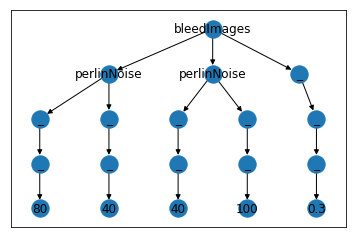

In [65]:
#https://gist.github.com/macrintr/9876942

def _(a):
    return a

def rand100():
  return random.randrange(100) + 1

# Define input types and output type
pset = gp.PrimitiveSetTyped("main", [], np.ndarray)

# Add operators
pset.addPrimitive(perlinNoise, [int, int], np.ndarray)
#pset.addPrimitive(addImages, [np.ndarray, np.ndarray], np.ndarray)
pset.addPrimitive(bleedImages, [np.ndarray, np.ndarray, float], np.ndarray)
pset.addPrimitive(_, [float], float)
pset.addPrimitive(_, [int], int)

pset.addTerminal(100, int)
pset.addTerminal(80, int)
pset.addTerminal(60, int)
pset.addTerminal(40, int)
pset.addTerminal(20, int)

pset.addTerminal(0.0, float)
pset.addTerminal(0.1, float)
pset.addTerminal(0.2, float)
pset.addTerminal(0.3, float)
pset.addTerminal(0.4, float)
pset.addTerminal(0.5, float)


# Create individual and add tree with primitives
creator.create("Individual", gp.PrimitiveTree, pset=pset)
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=10)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
expr = toolbox.individual()
tree = gp.PrimitiveTree(expr)
f = gp.compile(tree, pset)
print(expr)
plotTree(expr)

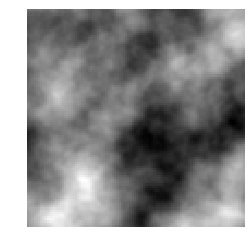

In [67]:
image = np.zeros((100, 100))
a = f
plotImage(a)